In [1]:
datTree = Tree(JetHT_Data_UL)
datTree.initialize_t6_X()

X = datTree.t6_X

In [2]:
cut_6jNN = 0

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [3]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

In [4]:
dat_6sums = ak.sum(datTree.t6_jet_btag, axis=1)/6

In [5]:
#### DATA ####
dat_6jNN_mask = datTree.b_6j_score > cut_6jNN # pass 6jNN mask

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)
dat_Dm      = datTree.t6_higgs_m - 125
dat_Dm_pos  = ak.all(datTree.t6_higgs_m - 125 > 0, axis=1)
dat_Dm_neg  = ak.all(datTree.t6_higgs_m - 125 < 0, axis=1)

# triple mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
dat_CR = ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

hi_m = ak.all(dat_Dm < -SR_edge, axis=1)
lo_m = ak.all(dat_Dm > -VR_edge, axis=1)
dat_SRlo = ak.all(dat_Dm >= -SR_edge, axis=1) # SR
# dat_VRlo = ak.all(dat_Dm[dat_Dm_neg] < -SR_edge, axis=1) & ak.all(dat_Dm[dat_Dm_neg] >= -VR_edge, axis=1) # VR
dat_VRlo = hi_m & lo_m # VR
dat_CRlo = ak.all(dat_Dm < -VR_edge, axis=1) # CR

hi_m = ak.all(dat_Dm <= VR_edge, axis=1)
lo_m = ak.all(dat_Dm > SR_edge, axis=1)
dat_SRhi = ak.all(dat_Dm <= SR_edge, axis=1) # SR
dat_VRhi = hi_m & lo_m # VR
dat_CRhi = ak.all(dat_Dm > VR_edge, axis=1) # CR

In [6]:
dat_CR_lo = dat_Dm_neg & dat_CRlo
dat_CR_hi = dat_Dm_pos & dat_CRhi

dat_VR_lo = dat_Dm_neg & dat_VRlo
dat_VR_hi = dat_Dm_pos & dat_VRhi

In [7]:
print(ak.sum(dat_CR_lo))
print(ak.sum(dat_CR_hi))

print(ak.sum(dat_VR_lo))
print(ak.sum(dat_VR_hi))

4224
65338
14520
8784


In [8]:
nbins = 60
mBins = np.linspace(0,2000,nbins)

In [9]:
score_cut = 0.65

#### DATA ####
# score veto
dat_ls_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 < score_cut # ls
dat_hs_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 >= score_cut # hs

dat_CR_lo_ls = dat_ls_mask & dat_CR_lo
dat_CR_hi_ls = dat_ls_mask & dat_CR_hi
dat_CR_lo_hs = dat_hs_mask & dat_CR_lo
dat_CR_hi_hs = dat_hs_mask & dat_CR_hi

dat_VR_lo_ls = dat_ls_mask & dat_VR_lo
dat_VR_hi_ls = dat_ls_mask & dat_VR_hi
dat_VR_lo_hs = dat_hs_mask & dat_VR_lo
dat_VR_hi_hs = dat_hs_mask & dat_VR_hi

# combination
dat_CRls_mask = dat_6jNN_mask & dat_CR & dat_ls_mask
dat_CRhs_mask = dat_6jNN_mask & dat_CR & dat_hs_mask
dat_VRls_mask = dat_6jNN_mask & dat_VR & dat_ls_mask
dat_VRhs_mask = dat_6jNN_mask & dat_VR & dat_hs_mask
dat_SRls_mask = dat_6jNN_mask & dat_SR & dat_ls_mask

In [23]:
dat_Dm_neg & dat_CRls_mask

<Array [False, False, False, ... False, False] type='434815 * bool'>

In [24]:
CRlslo = (dat_Dm_neg & dat_CRls_mask).to_numpy()
CRlshi = (dat_Dm_pos & dat_CRls_mask).to_numpy()
CRhslo = (dat_Dm_neg & dat_CRhs_mask).to_numpy()
CRhshi = (dat_Dm_pos & dat_CRhs_mask).to_numpy()

VRlslo = (dat_Dm_neg & dat_VRls_mask).to_numpy()
VRlshi = (dat_Dm_pos & dat_VRls_mask).to_numpy()
VRhslo = (dat_Dm_neg & dat_VRhs_mask).to_numpy()
VRhshi = (dat_Dm_pos & dat_VRhs_mask).to_numpy()

In [67]:
np.array_equal(VRhslo, VRhshi)

False

In [25]:
print(len(dat_CRls_mask))
print(ak.sum(dat_CRls_mask))
print(len(CRlslo))

434815
59360
434815


In [11]:
TF = ak.sum(dat_CRhs_mask)/ak.sum(dat_CRls_mask)
TF

0.18360849056603773

In [34]:
print(ak.sum(dat_CR_lo_ls))
print(ak.sum(dat_CR_hi_ls))
print(ak.sum(dat_CR_lo_hs))
print(ak.sum(dat_CR_hi_hs))

TF_lo = ak.sum(dat_CR_lo_hs)/ak.sum(dat_CR_lo_ls)
TF_hi = ak.sum(dat_CR_hi_hs)/ak.sum(dat_CR_hi_ls)
TF_lohi = ak.sum(dat_CR_hi_hs)/ak.sum(dat_CR_lo_ls)
TF_hilo = ak.sum(dat_CR_lo_hs)/ak.sum(dat_CR_hi_ls)

print()
print(TF_lo)
print(TF_hi)

3483
55285
741
10053

0.2127476313522825
0.18183955865062856


1
1
1
1
1
1


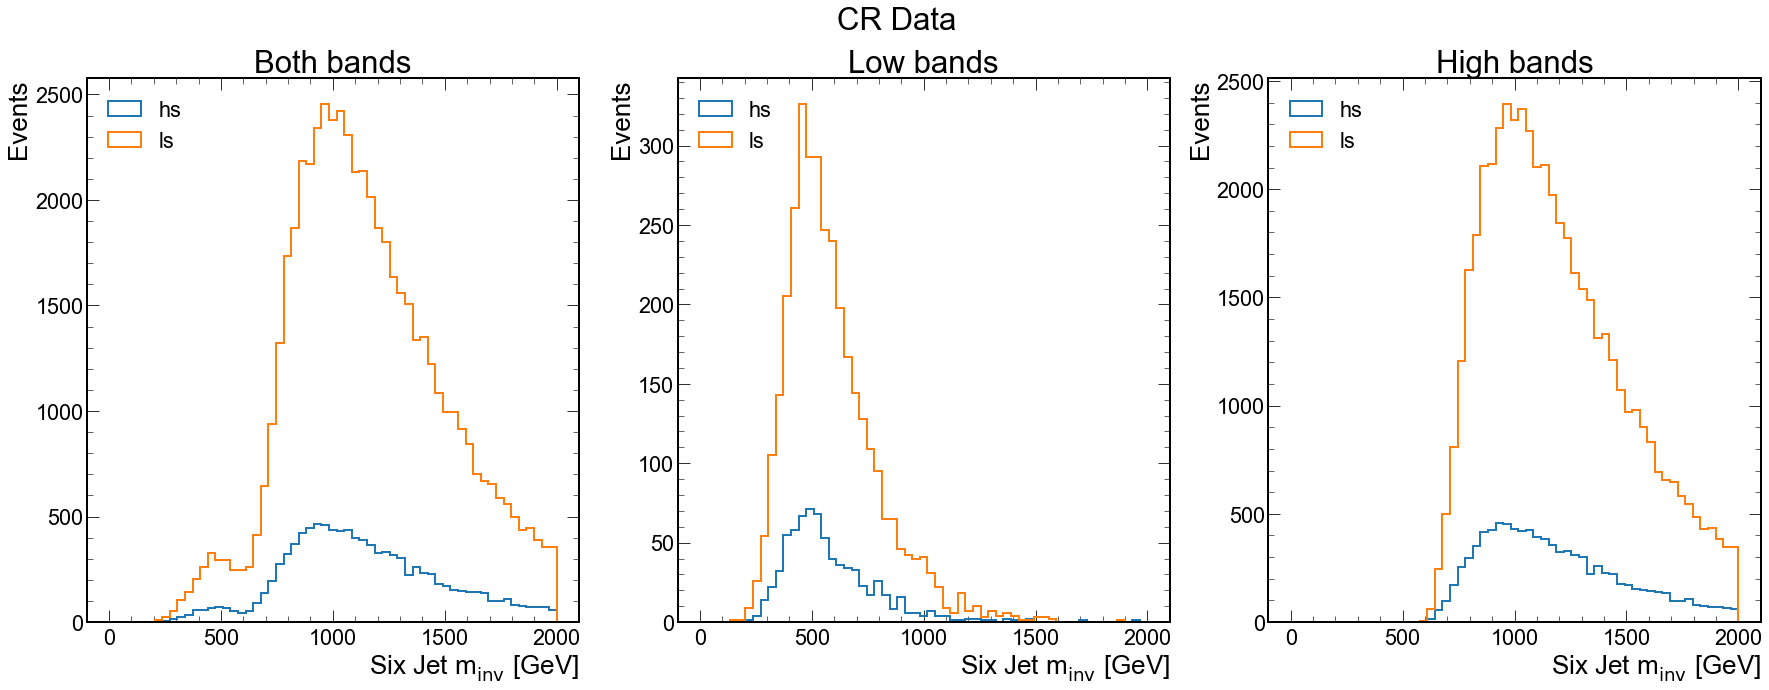

In [108]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
fig.suptitle('CR Data')

ax = axs[0]
ax.set_title('Both bands')

n_CRhs, e = Hist(X.m[dat_CRhs_mask], bins=mBins, ax=ax, label='hs')
n_CRls, e = Hist(X.m[dat_CRls_mask], bins=mBins, ax=ax, label='ls')

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

ax = axs[1]
ax.set_title('Low bands')

n_CRhs, e = Hist(X.m[CRhslo], bins=mBins, ax=ax, label='hs')
n_CRls, e = Hist(X.m[CRlslo], bins=mBins, ax=ax, label='ls')

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

ax = axs[2]
ax.set_title('High bands')

n_CRhs, e = Hist(X.m[CRhshi], bins=mBins, ax=ax, label='hs')
n_CRls, e = Hist(X.m[CRlshi], bins=mBins, ax=ax, label='ls')

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs.pdf')

1
1
1
1


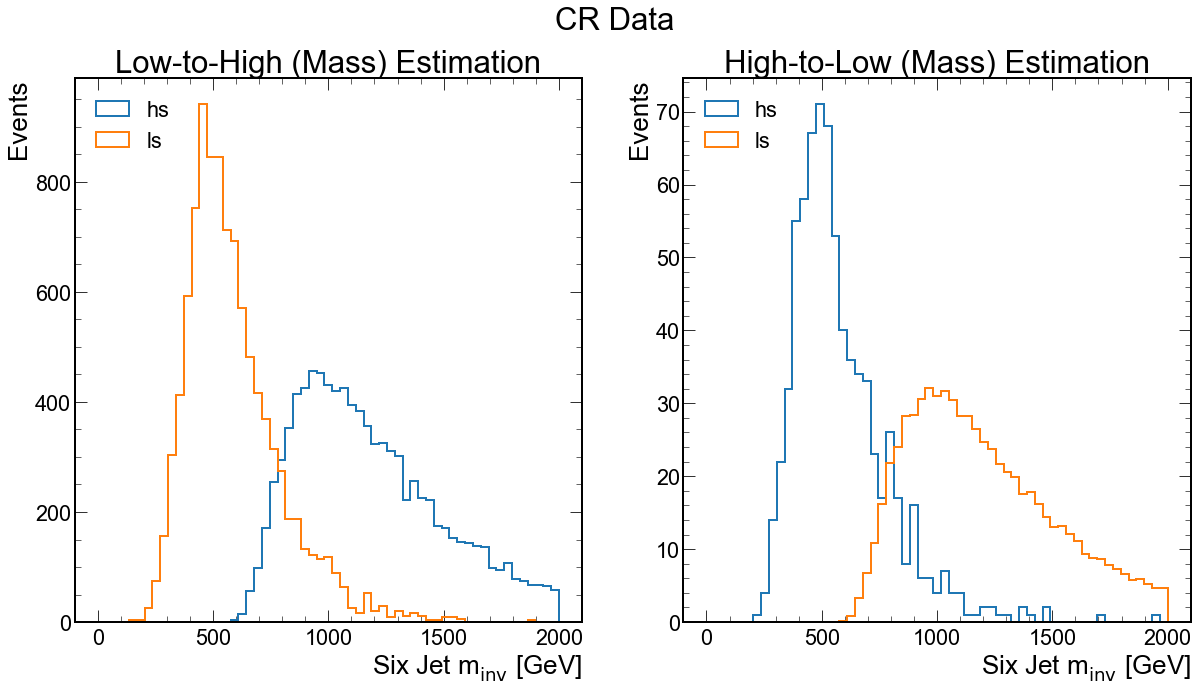

In [110]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
fig.suptitle('CR Data')

ax = axs[0]
ax.set_title('Low-to-High (Mass) Estimation')

n_CRhs, e = Hist(X.m[CRhshi], bins=mBins, ax=ax, label='hs')
n_CRls, e = Hist(X.m[CRlslo], bins=mBins, ax=ax, label='ls', weights=np.ones_like(X.m[CRlslo])*TF_lohi)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

ax = axs[1]
ax.set_title('High-to-Low (Mass) Estimation')

n_CRhs, e = Hist(X.m[CRhslo], bins=mBins, ax=ax, label='hs')
n_CRls, e = Hist(X.m[CRlshi], bins=mBins, ax=ax, label='ls', weights=np.ones_like(X.m[CRlshi])*TF_hilo)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs.pdf')

1
1
1
1


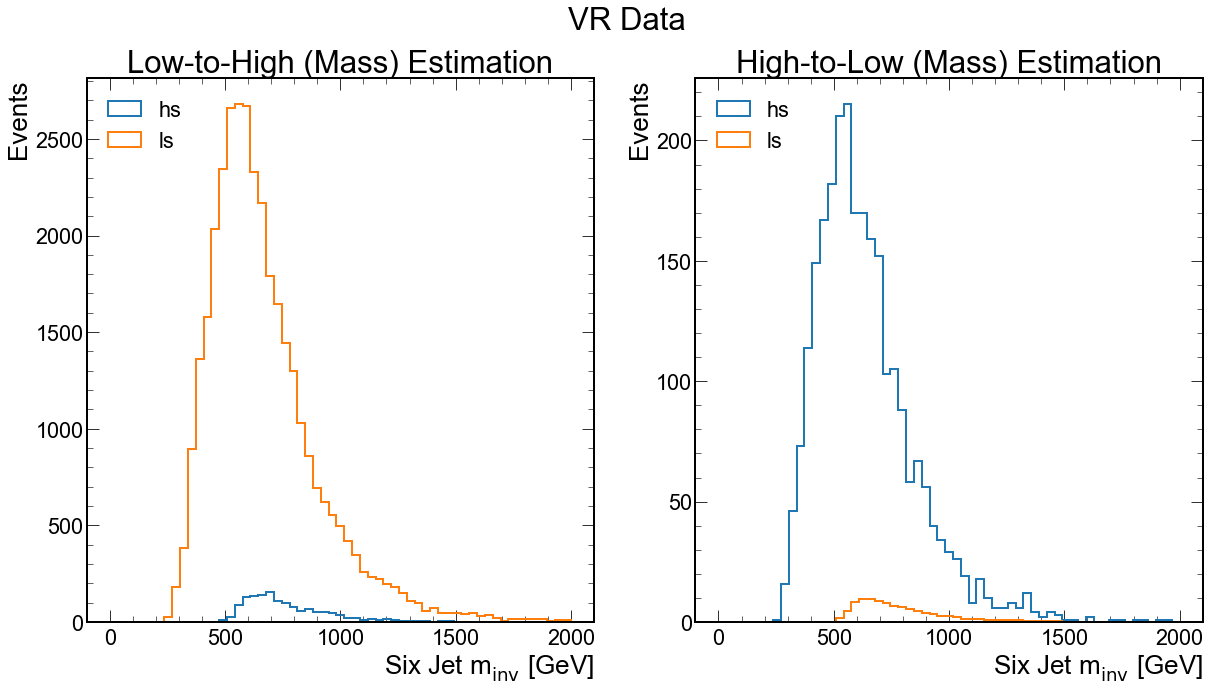

In [111]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
fig.suptitle('VR Data')

ax = axs[0]
ax.set_title('Low-to-High (Mass) Estimation')

n_VRhs, e = Hist(X.m[VRhshi], bins=mBins, ax=ax, label='hs')
n_VRls, e = Hist(X.m[VRlslo], bins=mBins, ax=ax, label='ls', weights=np.ones_like(X.m[VRlslo])*TF_lohi)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

ax = axs[1]
ax.set_title('High-to-Low (Mass) Estimation')

n_VRhs, e = Hist(X.m[VRhslo], bins=mBins, ax=ax, label='hs')
n_VRls, e = Hist(X.m[VRlshi], bins=mBins, ax=ax, label='ls', weights=np.ones_like(X.m[VRlshi])*TF_hilo)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs.pdf')

In [13]:
max_mass = 2000
min_mass = 250

In [14]:
dat_CRls_mask
dat_CRhs_mask
dat_VRls_mask
dat_VRhs_mask

<Array [False, False, False, ... False, False] type='434815 * bool'>

In [15]:
dat_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0].to_numpy()
dat_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1].to_numpy()
dat_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0].to_numpy()
dat_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1].to_numpy()
dat_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0].to_numpy()
dat_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1].to_numpy()
dat_H1_pt = datTree.t6_higgs_pt[:,0].to_numpy()
dat_H2_pt = datTree.t6_higgs_pt[:,1].to_numpy()
dat_H3_pt = datTree.t6_higgs_pt[:,2].to_numpy()
dat_H1_eta = datTree.t6_higgs_eta[:,0].to_numpy()
dat_H2_eta = datTree.t6_higgs_eta[:,1].to_numpy()
dat_H3_eta = datTree.t6_higgs_eta[:,2].to_numpy()
dat_H1_dr = datTree.t6_higgs_dr[:,0].to_numpy()
dat_H2_dr = datTree.t6_higgs_dr[:,1].to_numpy()
dat_H3_dr = datTree.t6_higgs_dr[:,2].to_numpy()

In [21]:
print(len(dat_H1_b1_pt[dat_CRls_mask]))
print(len(CRlslo))

59360
59360


In [30]:
data_crlslo = np.column_stack((dat_H1_b1_pt[CRlslo], dat_H1_b2_pt[CRlslo], dat_H2_b1_pt[CRlslo], dat_H2_b2_pt[CRlslo], dat_H3_b1_pt[CRlslo], dat_H3_b2_pt[CRlslo], dat_H1_pt[CRlslo], dat_H2_pt[CRlslo], dat_H3_pt[CRlslo], dat_H1_dr[CRlslo], dat_H2_dr[CRlslo], dat_H3_dr[CRlslo], dat_H1_eta[CRlslo], dat_H2_eta[CRlslo], dat_H3_eta[CRlslo]))
data_crhslo = np.column_stack((dat_H1_b1_pt[CRhslo], dat_H1_b2_pt[CRhslo], dat_H2_b1_pt[CRhslo], dat_H2_b2_pt[CRhslo], dat_H3_b1_pt[CRhslo], dat_H3_b2_pt[CRhslo], dat_H1_pt[CRhslo], dat_H2_pt[CRhslo], dat_H3_pt[CRhslo], dat_H1_dr[CRhslo], dat_H2_dr[CRhslo], dat_H3_dr[CRhslo], dat_H1_eta[CRhslo], dat_H2_eta[CRhslo], dat_H3_eta[CRhslo]))

In [29]:
data_crlshi = np.column_stack((dat_H1_b1_pt[CRlshi], dat_H1_b2_pt[CRlshi], dat_H2_b1_pt[CRlshi], dat_H2_b2_pt[CRlshi], dat_H3_b1_pt[CRlshi], dat_H3_b2_pt[CRlshi], dat_H1_pt[CRlshi], dat_H2_pt[CRlshi], dat_H3_pt[CRlshi], dat_H1_dr[CRlshi], dat_H2_dr[CRlshi], dat_H3_dr[CRlshi], dat_H1_eta[CRlshi], dat_H2_eta[CRlshi], dat_H3_eta[CRlshi]))
data_crhshi = np.column_stack((dat_H1_b1_pt[CRhshi], dat_H1_b2_pt[CRhshi], dat_H2_b1_pt[CRhshi], dat_H2_b2_pt[CRhshi], dat_H3_b1_pt[CRhshi], dat_H3_b2_pt[CRhshi], dat_H1_pt[CRhshi], dat_H2_pt[CRhshi], dat_H3_pt[CRhshi], dat_H1_dr[CRhshi], dat_H2_dr[CRhshi], dat_H3_dr[CRhshi], dat_H1_eta[CRhshi], dat_H2_eta[CRhshi], dat_H3_eta[CRhshi]))

In [32]:
data_vrlslo = np.column_stack((dat_H1_b1_pt[VRlslo], dat_H1_b2_pt[VRlslo], dat_H2_b1_pt[VRlslo], dat_H2_b2_pt[VRlslo], dat_H3_b1_pt[VRlslo], dat_H3_b2_pt[VRlslo], dat_H1_pt[VRlslo], dat_H2_pt[VRlslo], dat_H3_pt[VRlslo], dat_H1_dr[VRlslo], dat_H2_dr[VRlslo], dat_H3_dr[VRlslo], dat_H1_eta[VRlslo], dat_H2_eta[VRlslo], dat_H3_eta[VRlslo]))
data_vrhslo = np.column_stack((dat_H1_b1_pt[VRhslo], dat_H1_b2_pt[VRhslo], dat_H2_b1_pt[VRhslo], dat_H2_b2_pt[VRhslo], dat_H3_b1_pt[VRhslo], dat_H3_b2_pt[VRhslo], dat_H1_pt[VRhslo], dat_H2_pt[VRhslo], dat_H3_pt[VRhslo], dat_H1_dr[VRhslo], dat_H2_dr[VRhslo], dat_H3_dr[VRhslo], dat_H1_eta[VRhslo], dat_H2_eta[VRhslo], dat_H3_eta[VRhslo]))

In [33]:
data_vrlshi = np.column_stack((dat_H1_b1_pt[VRlshi], dat_H1_b2_pt[VRlshi], dat_H2_b1_pt[VRlshi], dat_H2_b2_pt[VRlshi], dat_H3_b1_pt[VRlshi], dat_H3_b2_pt[VRlshi], dat_H1_pt[VRlshi], dat_H2_pt[VRlshi], dat_H3_pt[VRlshi], dat_H1_dr[VRlshi], dat_H2_dr[VRlshi], dat_H3_dr[VRlshi], dat_H1_eta[VRlshi], dat_H2_eta[VRlshi], dat_H3_eta[VRlshi]))
data_vrhshi = np.column_stack((dat_H1_b1_pt[VRhshi], dat_H1_b2_pt[VRhshi], dat_H2_b1_pt[VRhshi], dat_H2_b2_pt[VRhshi], dat_H3_b1_pt[VRhshi], dat_H3_b2_pt[VRhshi], dat_H1_pt[VRhshi], dat_H2_pt[VRhshi], dat_H3_pt[VRhshi], dat_H1_dr[VRhshi], dat_H2_dr[VRhshi], dat_H3_dr[VRhshi], dat_H1_eta[VRhshi], dat_H2_eta[VRhshi], dat_H3_eta[VRhshi]))

In [36]:
cols = ['H1 b1 pt','H1 b2 pt','H2 b1 pt','H2 b2 pt','H3 b1 pt','H3 b1 pt','H1 pt','H2 pt','H3 pt','H1 dr','H2 dr','H3 dr','H1 eta','H2 eta','H3 eta']

In [38]:
from hep_ml import reweight
from pandas import DataFrame

In [39]:
df_crlslo = DataFrame(data=data_crlslo, columns=cols)
df_crhslo = DataFrame(data=data_crhslo, columns=cols)
df_crlshi = DataFrame(data=data_crlshi, columns=cols)
df_crhshi = DataFrame(data=data_crhshi, columns=cols)

In [44]:
df_vrlslo = DataFrame(data=data_vrlslo, columns=cols)
df_vrhslo = DataFrame(data=data_vrhslo, columns=cols)
df_vrlshi = DataFrame(data=data_vrlshi, columns=cols)
df_vrhshi = DataFrame(data=data_vrhshi, columns=cols)

In [40]:
# A set of BDT arguments borrowed from 4b analysis
# Nestimators, learningRate, maxDepth, minLeaves, GB['subsample'], randomState, nFolds
args = [40, 0.1, 3, 300, 0.6, 2020]

In [103]:
TF_lohi

2.8863049095607236

In [42]:
ls_weights_lohi = np.ones(len(df_crlslo))*TF_lohi
hs_weights_lohi = np.ones(len(df_crhshi))

np.random.seed(args[5]) #Fix any random seed using numpy arrays
reweighter_base_lo = reweight.GBReweighter(n_estimators=args[0], learning_rate=args[1], max_depth=args[2], min_samples_leaf=args[3],gb_args={'subsample': args[4]})
reweighter_lohi = reweight.FoldingReweighter(reweighter_base_lo, random_state=args[5], n_folds=2, verbose=False)
reweighter_lohi.fit(df_crlslo,df_crhshi,ls_weights_lohi,hs_weights_lohi)

FoldingReweighter(base_reweighter=GBReweighter(gb_args={'subsample': 0.6},
                                               learning_rate=0.1,
                                               min_samples_leaf=300),
                  random_state=2020, verbose=False)

In [47]:
ls_weights_lohi = np.ones(len(df_vrlslo))*TF_lohi
ws_lohi = reweighter_lohi.predict_weights(df_vrlslo,ls_weights_lohi,lambda x: np.mean(x, axis=0))

In [64]:
X_vr_ls_lo = ak.nan_to_num(X.m[VRlslo],0).to_numpy()
X_vr_ls_hi = ak.nan_to_num(X.m[VRlshi],0).to_numpy()
X_vr_hs_lo = ak.nan_to_num(X.m[VRhslo],0).to_numpy()
X_vr_hs_hi = ak.nan_to_num(X.m[VRhshi],0).to_numpy()

In [70]:
print(X_vr_hs_hi)
print(X_vr_ls_lo)

[607.129   722.15985 976.3485  ... 941.97174 489.0244  766.75665]
[512.08746 720.36224 468.0693  ... 868.54065 461.20764 557.90454]


In [68]:
print(X.m[VRlslo])
print(X.m[VRlshi])
print(X.m[VRhslo])
print(X.m[VRhshi])

[512, 720, 468, 321, 832, 758, 390, 768, ... 576, 411, 401, 1.08e+03, 869, 461, 558]
[640, 618, 800, 878, 933, 629, 631, ... 743, 582, 816, 790, 596, 1.11e+03, 1e+03]
[923, 768, 409, 757, 629, 1.14e+03, 613, ... 704, 424, 1.12e+03, 589, 809, 583, 364]
[607, 722, 976, 927, 672, 1.04e+03, 634, ... 689, 745, 693, 1.08e+03, 942, 489, 767]


In [71]:
print(X_vr_ls_lo)
print(X_vr_hs_hi)

[512.08746 720.36224 468.0693  ... 868.54065 461.20764 557.90454]
[607.129   722.15985 976.3485  ... 941.97174 489.0244  766.75665]


In [74]:
testing = False
testing == 0

True

In [100]:
ws_lohi

array([1.06082901e-06, 4.49434505e-05, 3.32399828e+07, ...,
       1.06726974e-04, 8.70646933e-04, 6.93963589e-06])

1
1
0
[1.06082901e-06 4.49434505e-05 3.32399828e+07 ... 1.06726974e-04
 8.70646933e-04 6.93963589e-06]
[6.28323483e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.03238884e+07
 4.36815766e+09 5.51950507e+09 1.10385972e+10 1.17015204e+10
 1.66144030e+10 1.28584611e+10 7.28730987e+09 8.83388290e+09
 7.35920327e+09 5.86847112e+09 3.17763210e+09 1.74415623e+09
 2.39122992e+09 6.54412394e+08 1.15715409e+09 1.78116584e+09
 6.72760541e+08 3.27423890e+08 2.80742655e+08 4.46454802e+08
 4.37317187e+08 3.27607836e+08 3.63025347e+08 1.84955383e+08
 1.40075684e-02 1.12152100e-02 4.67796134e+08 2.06891203e+08
 6.30187988e-03 5.06591797e-03 1.20544434e-03 2.09045410e-03
 2.89916992e-04 1.17034912e-02 6.25610352e-04 3.05175781e-04
 3.26538086e-03 7.32421875e-04 3.63159180e-03 1.67846680e-04
 7.62939453e-04 1.37329102e-04 1.22070312e-04 3.66210938e-04
 1.37329102e-04 1.75476074e-03 1.52587891e-04 1.52587891e-04
 1.06811523e-04 1.35803223e-03 6.10351562e-

Text(0, 1, 'Events')

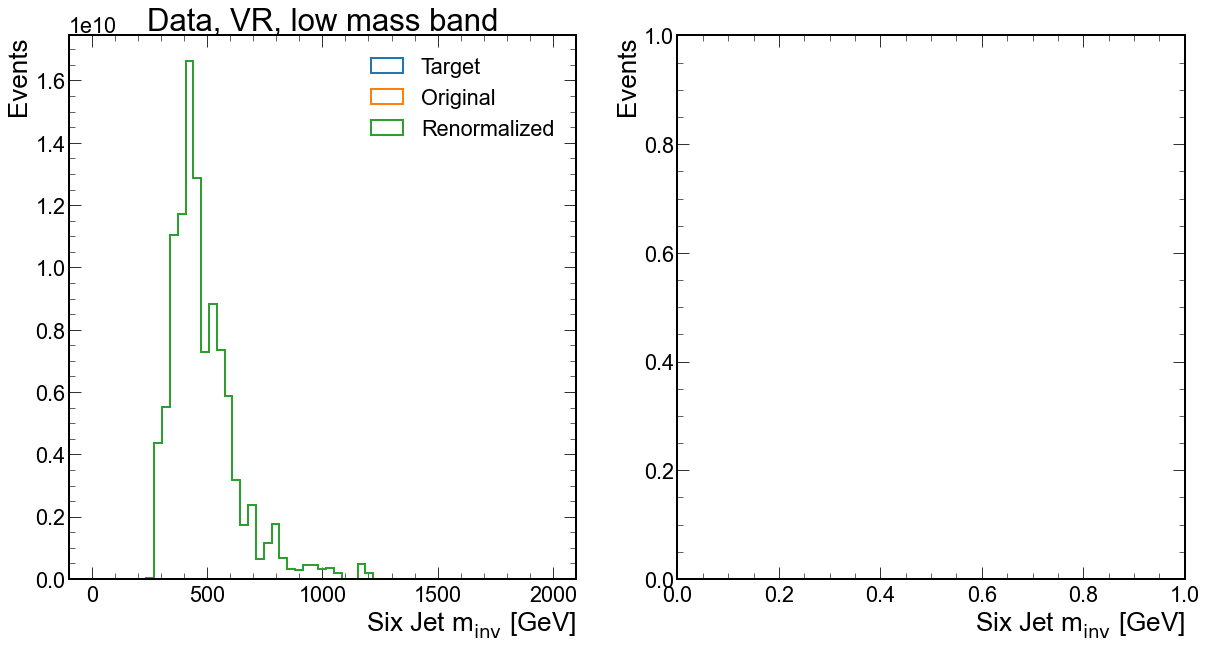

In [102]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax = axs[0]

ax.set_title('Data, VR, low mass band')

n, e = Hist(X_vr_hs_hi, bins=mBins, ax=ax, label='Target')
n, e = Hist(X_vr_ls_lo, bins=mBins, ax=ax, label='Original')
# n_VRls_lo, e = np.histogram(X_vr_ls_lo, bins=mBins)
n_VRls_transformed, e = Hist(X_vr_ls_lo, evt_weights=ws_lohi, bins=mBins, ax=ax, label='Renormalized', scale=0)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
# ax.legend(loc=2)


ax = axs[1]
# ax.set_title('Data, VR, BDT, high mass band')

# n_VRls_hi, e = np.histogram(X.m[dat_VRls_mask].to_numpy()[VRlshi], bins=mBins)
# n_VRls_transformed, e = Hist(X_vr_ls_hi, weights=ws_unnormalized_hi_vr, bins=mBins, ax=ax, label='VR ls (renormalized)', scale=False)
# n_VRhs, e = Hist(X.m[dat_VRhs_mask].to_numpy()[VRhshi], bins=mBins, ax=ax, label='VR hs')

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
# ax.legend(loc=2)

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRlo_v_VRhi_BDT.pdf')